In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cross_validation(n_folds=5, n_samples = 25):
    plt.figure(figsize=(12, 2))
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[-2], bars[-1]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)

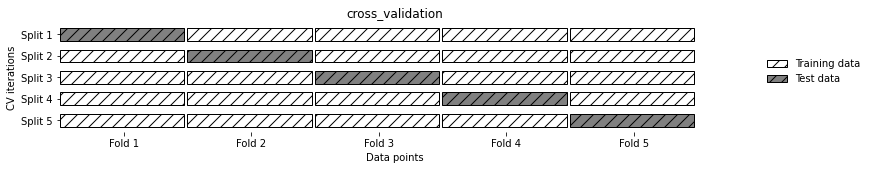

In [23]:
plot_cross_validation(n_folds=5, n_samples=20)

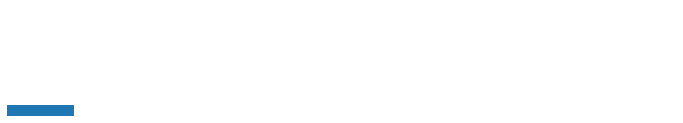

In [35]:
import matplotlib.patches
from matplotlib.patches import Rectangle

plt.figure(figsize=(12, 2))
ax.add_patch(Rectangle((0,0), 0.1, 0.1))
ax.add_patch(Rectangle((3,0), 1, 1))


<AxesSubplot:>

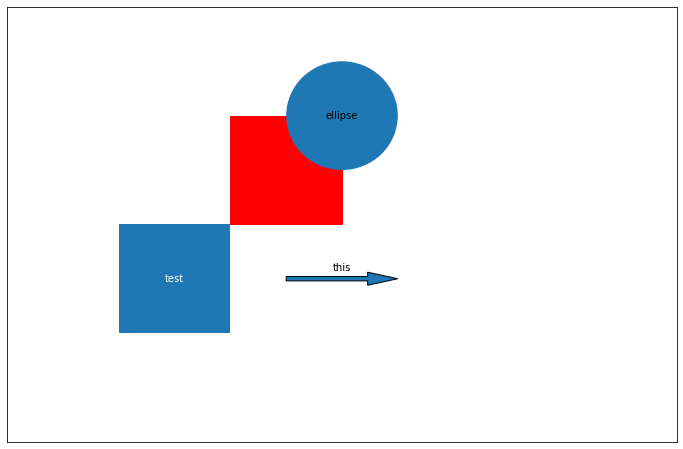

In [1]:
import matplotlib.patches
from matplotlib.patches import Rectangle, Ellipse, FancyArrow, Arrow
import matplotlib.pyplot as plt
import numpy as np


class canvas:
    def __init__(self, figsize, pixsize):
        plt.figure(figsize=figsize)
        self.pixsize = pixsize
        self.ax = ax = plt.gca()
        #self.ax.set_frame_on(False)
        self.ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
        self.ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 1)
    def get_ax(self):
        return self.ax
    def _normalize(self, p):
        return (p[0] / self.pixsize[0], p[1] /self.pixsize[1])
    def rect(self, p, width, height, label=None, label_color=None, **attr):
        sp = self._normalize(p)
        sw, sh = self._normalize((width,height))
        self.ax.add_patch(Rectangle(sp, sw, sh, **attr))
        if label:
            self.ax.text(sp[0] + sw/2, sp[1] + sh/2, label, color=label_color, ha="center", va="center")
    def ellipse(self, p, width, height, label=None, label_color=None, **attr):
        sp = self._normalize(p)
        sw, sh = self._normalize((width,height))
        self.ax.add_patch(Ellipse(sp, sw, sh, **attr))
        if label:
            self.ax.text(sp[0], sp[1], label, color=label_color, ha="center", va="center")
    def arrow(self, p, width, height, label=None, label_offset=(0,0), label_color=None, **attr):
        sp = self._normalize(p)
        sw, sh = self._normalize((width,height))
        self.ax.add_patch(FancyArrow(sp[0], sp[1], sw, sh, width=0.01, length_includes_head=True, **attr))
        dx, dy = self._normalize(label_offset)
        if label:
            self.ax.text(sp[0] + sw/2 + dx, sp[1] + sh/2 + dy, label, color=label_color, ha="center", va="center")
    def text(self, p, label, **attr):
        sp = self._normalize(p)
        self.ax.text(sp[0], sp[1], label, **attr)

c = canvas((12,8), (600, 400))
c.rect((100, 100), 100, 100, label="test", label_color="white")
c.rect((200, 200), 100, 100, color='r')
c.ellipse((300,300), 100, 100, label="ellipse")
c.arrow((250,150), 100, 0, label="this", label_offset=(0, 10))
c.get_ax()


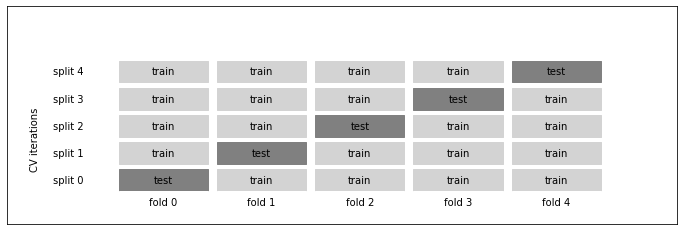

In [62]:

c = canvas((12,4), (600, 200))

off = (100, 30)
r_size = (80, 20)
r_gap = (8, 5)
div = 5
for x in range(div):
    for y in range(div):
        color = "gray" if x == y else "lightgray"
        label = "test" if x == y else "train"
        c.rect((off[0] + (r_size[0] + r_gap[0]) * x, off[1] + (r_size[1] + r_gap[1]) * y), r_size[0], r_size[1], label = label, color=color)

for x in range(div):
    c.rect((off[0] + (r_size[0] + r_gap[0]) * x, 10), r_size[0], r_size[1], label = "fold {}".format(x), color="w")

for y in range(div):
    c.rect((15, off[1] + (r_size[1] + r_gap[1]) * y), r_size[0], r_size[1], label = "split {}".format(y), color="w")

c.text((20, 50), "CV iterations", rotation=90)
